# Análise Exploratória

## Imports

In [30]:
# Importando bibliotecas
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

## Dataframe Ipea

In [3]:
# Lendo arquivo Ipea
df_ipeadata = pd.read_csv("DataFrame\ipeadata.csv", index_col=0)
df_ipeadata

,dt,preco
0,2023-12-26,"80,23"
1,2023-12-22,"80,23"
2,2023-12-21,"80,73"
3,2023-12-20,"81,10"
4,2023-12-19,"79,82"
...,...,...
11069,1987-05-26,"18,63"
11070,1987-05-25,"18,60"
11071,1987-05-22,"18,55"
11072,1987-05-21,"18,45"


In [4]:
# Convertendo coluna 'dt' para datetime
df_ipeadata['dt'] = pd.to_datetime(df_ipeadata['dt'], format='%Y-%m-%d').dt.date
df_ipeadata

,dt,preco
0,2023-12-26,"80,23"
1,2023-12-22,"80,23"
2,2023-12-21,"80,73"
3,2023-12-20,"81,10"
4,2023-12-19,"79,82"
...,...,...
11069,1987-05-26,"18,63"
11070,1987-05-25,"18,60"
11071,1987-05-22,"18,55"
11072,1987-05-21,"18,45"


In [5]:
# Convertendo valores da coluna 'preco' para tipo float
df_ipeadata['preco'] = df_ipeadata['preco'].str.replace(',', '.').astype(float)
df_ipeadata

,dt,preco
0,2023-12-26,80.23
1,2023-12-22,80.23
2,2023-12-21,80.73
3,2023-12-20,81.10
4,2023-12-19,79.82
...,...,...
11069,1987-05-26,18.63
11070,1987-05-25,18.60
11071,1987-05-22,18.55
11072,1987-05-21,18.45


## Crises Financeiras

In [2]:
# Criando DataFrame das crises financeiras
data_crise_financeira = [['Recessão da Guerra do Golfo',pd.Period('1990-07', freq='M'),pd.Period('1991-03', freq='M'),8,1.5,6.8],
                         ['Recessão Bolha das Pontocom',pd.Period('2001-03', freq='M'),pd.Period('2001-11', freq='M'),8,0.3,5.5],
                         ['A Grande Recessão',pd.Period('2007-12', freq='M'),pd.Period('2009-06', freq='M'),18,4.3,9.5],
                         ['Recessão da COVID-19',pd.Period('2020-02', freq='M'),pd.Period('2020-04', freq='M'),2,None,None]]

df_crise_financeira = pd.DataFrame(data_crise_financeira, columns=['Evento', 'Início', 'Término', 'Duração', 'Declínio do PIB', 'Taxa máxima de desemprego'])
df_crise_financeira

# Fonte: https://www.investopedia.com/articles/economics/08/past-recessions.asp

,Evento,Início,Término,Duração,Declínio do PIB,Taxa máxima de desemprego
0,Recessão da Guerra do Golfo,1990-07,1991-03,8,1.5,6.8
1,Recessão Bolha das Pontocom,2001-03,2001-11,8,0.3,5.5
2,A Grande Recessão,2007-12,2009-06,18,4.3,9.5
3,Recessão da COVID-19,2020-02,2020-04,2,NaN,NaN


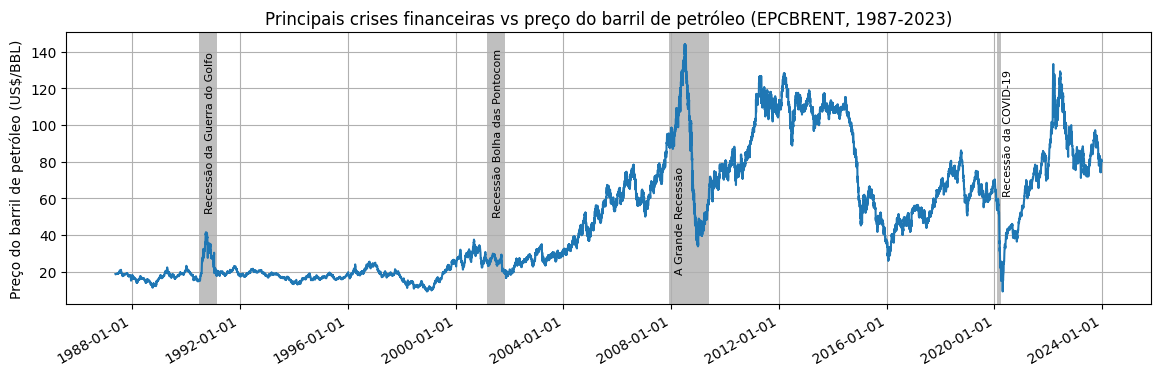

In [66]:
fig, ax = plt.subplots(1, figsize=[14,4])
ax.plot(df_ipeadata['dt'], df_ipeadata['preco'])

for x in range(0, df_crise_financeira.shape[0]):
    inicio = df_crise_financeira['Início'][x].to_timestamp().date()
    termino = df_crise_financeira['Término'][x].to_timestamp().date()
    ax.axvspan(inicio, termino, facecolor='gray', edgecolor='none', alpha=.5)
    if x==2:
        ax.text(inicio + pd.Timedelta(days=80), df_ipeadata['preco'].values.max()/3, df_crise_financeira['Evento'][x], rotation=90, va='center', fontsize=8)
    else:
        ax.text(inicio + pd.Timedelta(days=80), df_ipeadata['preco'].values.max()/1.5, df_crise_financeira['Evento'][x], rotation=90, va='center', fontsize=8)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()

plt.title('Principais crises financeiras vs preço do barril de petróleo (EPCBRENT, 1987-2023)')
#plt.xlabel('Ano')
plt.ylabel('Preço do barril de petróleo (US$/BBL)')
plt.grid(True)
plt.show()

#### Análise: Podemos verificar pelo gráfico que a maioria das principais recessões econômicas que tivemos no período aferido coincide com uma consideravel variação no preço do barril de petróleo. Não significa que as recessões necessariamente causaram a grande volatilidade no preço do barril, mas pode indicar que esses dois fatores possuem alguma correlação entre si.

## Principais guerras geopolíticas relacionadas ao petróleo

In [88]:
data_guerra_petroleo = [['Guerra Iran-Iraque',pd.Period('1980', freq='Y'),pd.Period('1988', freq='Y')],
                        ['Guerra do Golfo',pd.Period('1990', freq='Y'),pd.Period('1991', freq='Y')],
                        ['Guerra do Iraque',pd.Period('2003', freq='Y'),pd.Period('2011', freq='Y')],
                        ['Guerra Civil da Síria',pd.Period('2011', freq='Y'),pd.Period('2017', freq='Y')],
                        ['Guerra Rússia-Ucrânia',pd.Period('2022', freq='Y'),pd.Period('2024', freq='Y')]]

df_guerra_petroleo = pd.DataFrame(data_guerra_petroleo, columns=['Evento', 'Início', 'Término'])
df_guerra_petroleo

# Fonte: https://en.wikipedia.org/wiki/Oil_war

,Evento,Início,Término
0,Guerra Iran-Iraque,1980,1988
1,Guerra do Golfo,1990,1991
2,Guerra do Iraque,2003,2011
3,Guerra Civil da Síria,2011,2017
4,Guerra Rússia-Ucrânia,2022,2024


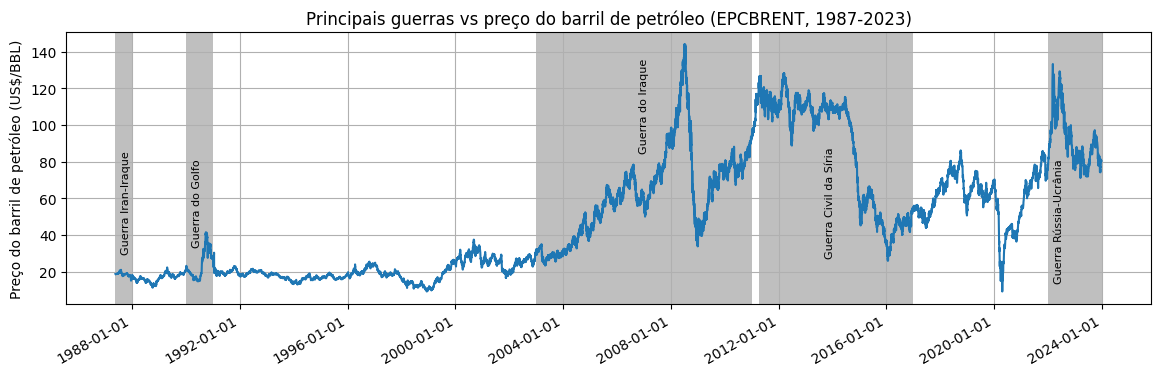

In [92]:
fig, ax = plt.subplots(1, figsize=[14,4])
ax.plot(df_ipeadata['dt'], df_ipeadata['preco'])

for x in range(0, df_guerra_petroleo.shape[0]):
    if x==0:
        inicio = df_ipeadata['dt'].min()
    else:
        inicio = df_guerra_petroleo['Início'][x].to_timestamp().date()
    termino = df_guerra_petroleo['Término'][x].to_timestamp().date()

    if x==3:
        ax.axvspan(inicio + pd.Timedelta(days=100), termino, facecolor='gray', edgecolor='none', alpha=.5)
    else:
        ax.axvspan(inicio, termino, facecolor='gray', edgecolor='none', alpha=.5)

    if x==4:
        ax.text(inicio + pd.Timedelta(days=80), df_ipeadata['preco'].values.max()/3, df_guerra_petroleo['Evento'][x], rotation=90, va='center', fontsize=8)
    elif x==3:
        ax.text(inicio + pd.Timedelta(days=1000), df_ipeadata['preco'].values.max()/2.5, df_guerra_petroleo['Evento'][x], rotation=90, va='center', fontsize=8)
    elif x==2:
        ax.text(inicio + pd.Timedelta(days=1400), df_ipeadata['preco'].values.max()/1.3, df_guerra_petroleo['Evento'][x], rotation=90, va='center', fontsize=8)
    else:
        ax.text(inicio + pd.Timedelta(days=80), df_ipeadata['preco'].values.max()/2.5, df_guerra_petroleo['Evento'][x], rotation=90, va='center', fontsize=8)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()

plt.title('Principais guerras vs preço do barril de petróleo (EPCBRENT, 1987-2023)')
#plt.xlabel('Ano')
plt.ylabel('Preço do barril de petróleo (US$/BBL)')
plt.grid(True)
plt.show()

#### Análise: Podemos perceber que assim como na análise das crises financeiras, existe uma grande variação no preço do barril de petróleo que coincide com as guerras realizadas durante o perído avaliado. Notamos que existe uma certa correlação das variações com os eventos bélicos. O petróleo é a principal fonte de renda de muitos países, sobretudo o Oriente Médio. Ele é atualmente uma das pricipais fontes de energia e serve para a fabricação de variados produtos de alta utilidade. Dessa forma, podemos inferir que o petróleo é um ítem de extrema importancia e muito disputado por diversos países do globo. Assim, é plausível que a variaçã do preço do barril de petróleo tenha uma correlação com eventos de cunho bélico como observado pela comparação destacada no gráfico.